In [225]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trail = pd.read_csv(clinical_trial_data_to_load)

In [226]:
# Combine the data into a single dataset
combined_data = pd.merge(clinical_trail, mouse_drug_data, on="Mouse ID", how="outer")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [228]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
tumor_average_df = pd.DataFrame(combined_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean().reset_index())
tumor_average_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Average'},inplace = True)

# Preview DataFrame
tumor_average_df

,Drug,Timepoint,Tumor Volume Average
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [229]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem_df = pd.DataFrame(combined_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem().reset_index())
tumor_sem_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume SEM'},inplace = True)
# Convert to DataFrame
# Preview DataFrame
tumor_sem_df

,Drug,Timepoint,Tumor Volume SEM
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [232]:
tumor_average_df.reset_index(inplace=True)

In [234]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
pivot_tumor = tumor_average_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume Average")
pivot_tumor

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [236]:
pivot_sem_tumor = tumor_sem_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume SEM")

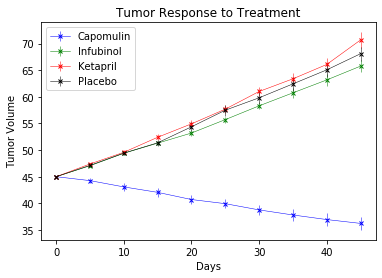

In [237]:
#plot instructions
#Creating a scatter plot that shows how the tumor volume changes over time for each treatment. 
#our objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare
#You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, X and Y Axis Limits, etc.

plt.title("Tumor Response to Treatment")

plt.errorbar(pivot_tumor.index, pivot_tumor['Capomulin'], yerr=pivot_sem_tumor['Capomulin'],
             color='blue', marker='x',markersize=4, linestyle='-', linewidth=0.5, label="Capomulin")

plt.errorbar(pivot_tumor.index, pivot_tumor['Infubinol'], yerr=pivot_sem_tumor['Infubinol'],
             color='green', marker='x', markersize=4, linestyle='-', linewidth=0.5, label="Infubinol")

plt.errorbar(pivot_tumor.index, pivot_tumor['Ketapril'], yerr=pivot_sem_tumor['Ketapril'],
             color='red', marker='x', markersize=4, linestyle='-', linewidth=0.5, label="Ketapril")

plt.errorbar(pivot_tumor.index, pivot_tumor['Placebo'], yerr=pivot_sem_tumor['Placebo'],
             color='black', marker='x', markersize=4, linestyle='-', linewidth=0.5, label="Placebo")

plt.legend(loc="best")

plt.xlabel("Days")

plt.ylabel("Tumor Volume")
 
plt.show()

#plt.savefig("Tumor Response To Treatment.png")


![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [239]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
metastatic_df = pd.DataFrame(combined_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean().reset_index())

# Preview DataFrame
metastatic_df

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [240]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
metastatic_sem_df = pd.DataFrame(combined_data.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem().reset_index())
metastatic_sem_df.rename(columns={'Metastatic Sites':'Metastatic Sites SEM'},inplace = True)

# Preview DataFrame
metastatic_sem_df

,Drug,Timepoint,Metastatic Sites SEM
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [241]:
metastatic_df.reset_index(inplace=True)

In [242]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked

pivot_metastatic = metastatic_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
pivot_metastatic


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [243]:
pivot_sem_metastatic = metastatic_sem_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites SEM")

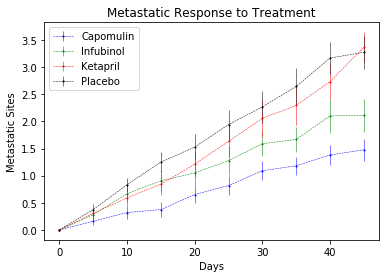

In [244]:
# Generate the Plot (with Error Bars)

# Save the Figure
# Show the Figure

plt.title("Metastatic Response to Treatment")

plt.errorbar(pivot_metastatic.index, pivot_metastatic['Capomulin'], yerr=pivot_sem_metastatic['Capomulin'],
             color='blue', marker='o',markersize=1, linestyle='--', linewidth=0.5, label="Capomulin")

plt.errorbar(pivot_metastatic.index, pivot_metastatic['Infubinol'], yerr=pivot_sem_metastatic['Infubinol'],
             color='green', marker='o', markersize=1, linestyle='--', linewidth=0.5, label="Infubinol")

plt.errorbar(pivot_metastatic.index, pivot_metastatic['Ketapril'], yerr=pivot_sem_metastatic['Ketapril'],
             color='red', marker='o', markersize=1, linestyle='--', linewidth=0.5, label="Ketapril")

plt.errorbar(pivot_metastatic.index, pivot_metastatic['Placebo'], yerr=pivot_sem_metastatic['Placebo'],
             color='black', marker='o', markersize=1, linestyle='--', linewidth=0.5, label="Placebo")

plt.legend(loc="best")

plt.xlabel("Days")

plt.ylabel("Metastatic Sites")
 
plt.show()



![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [213]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame

survival_df = pd.DataFrame(combined_data.groupby(["Drug","Timepoint"])["Mouse ID"].count().reset_index())

survival_df.rename(columns={'Mouse ID':'Mouse Count'},inplace = True)

# Preview DataFrame
survival_df


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [245]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame

pivot_survival = survival_df.pivot(index="Timepoint", columns="Drug", values="Mouse Count")
pivot_survival



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)